<a href="https://colab.research.google.com/github/ilman79/PelatihanBNSP/blob/main/Assesment_BNSP_Ilman_Gifari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deskripsi Data

Cardiovascular desease (CVD) atau penyakit kardiovaskuler merupakan salah satu penyebab kematian nomor satu secara global. Diestimasikan telah merenggut nyawa sekitar 18 juta jiwa setiap tahunnya atau 31% dari seluruh penyebab kematian secara global. Empat dari lima kematian CVD diakibatkan oleh serangan jantung dan stroke, dan sepertiganya dialami secara prematur oleh sesorang dengan usia di bawah 70 tahun.

Kegagalan jantung merupakan salah salah penyebab umum dari penyakit kardiovaskuler. Sebagai seorang associate data scientist, Anda ditugaskan untuk melakukan prediksi terhadap kemungkinan terjadinya penyakit jantung. Diharapkan pemodelan yang dihasilkan dapat membantu kinerja dokter dalam mendeteksi pasien dengan penyakit jantung, sehingga dapat menolong lebih banyak orang yang berisiko tinggi terkena penyakit kardiovaskuler.

Keterangan masing-masing variabel:

*   Age: Usia pasien (tahun)
*   Sex: Jenis kelamin pasien (M: Laki-laki, F: Perempuan)
*   ChestPainType: Jenis nyeri dada (TA: Angina Tipikal, ATA: Angina Atipikal, NAP: Nyeri Non-Anginal, ASY: Asimtomatik)
*   RestingBP: Tekanan darah istirahat (mm Hg)
*   Cholesterol: Kolesterol serum (mm/dl)
*   FastingBS: Gula darah saat puasa (1: jika FastingBS > 120 mg/dl, 0: sebaliknya)
*   RestingECG: Denyut jantung maksimal istirahat (Normal: Normal, ST: memiliki abnormalitas gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), LVH: menunjukkan hipertrofi ventrikel kiri yang mungkin atau pasti menurut kriteria Estes)
*   Exercise Angina : Mengalami Angina (Y: Ya, N: Tidak)
*   MaxHR: Denyut jantung maksimal yang dicapai (Nilai numerik antara 60 dan 202)
*   Oldpeak: Depresi ST (Nilai numerik diukur dalam depresi)
*   ST_Slope: Kemiringan segmen ST puncak latihan maksimal (Up: menanjak, Flat: datar, Down: menurun)
*   HeartDisease: Kelas output (1: penyakit jantung, 0: Normal)

#Import Libarary yang diperlukan

In [2]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 30.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import sweetviz
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

#Import Dataset

In [4]:
# Loading Data Untuk Latihan
file_ = 'data/heart.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

--2023-11-18 07:31:33--  https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35902 (35K) [text/plain]
Saving to: ‘data/heart.csv’

heart.csv           100%[===================>]  35.06K  --.-KB/s    in 0.01s   

2023-11-18 07:31:33 (3.46 MB/s) - ‘data/heart.csv’ saved [35902/35902]

baris =  918 , Kolom (jumlah variabel) =  12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Berikut adalah hasil dataset yang diimportkan dari sumber.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [6]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


Menampilkan variabel yang bentuk datanya object.

In [7]:
df['HeartDisease'] = df['HeartDisease'].astype('category')
df['FastingBS'] = df['FastingBS'].astype('category')

Mengubah tipe data variabel 'HeartDisease' dan 'FastingBS' menjadi kategorik.

In [8]:
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(2), int64(3)
memory usage: 43.2 KB


Mengubah semua tipe data variabel yang object menjadi kategorik.

# Penelaahan Data


Variabel "MaxHR", "RestingECG", dan "ExerciseAngina" keterangan di sumber data tidak sesuai pada logbook, Tetapi saat browsing di internet terdapat data yang sama dengan keterangan yang sesuai. Sehingga ketiga variabel tersebut tidak ada masalah.



#Check Noise dan Penanganan

Dilakukan pengecekan noise adalah untuk mencari data yang tidak wajar atau data yang memiliki nilai extreme yang berakibat data menjadi bias.

In [9]:
# import Module yang dibutuhkan untuk Visualisasi
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()

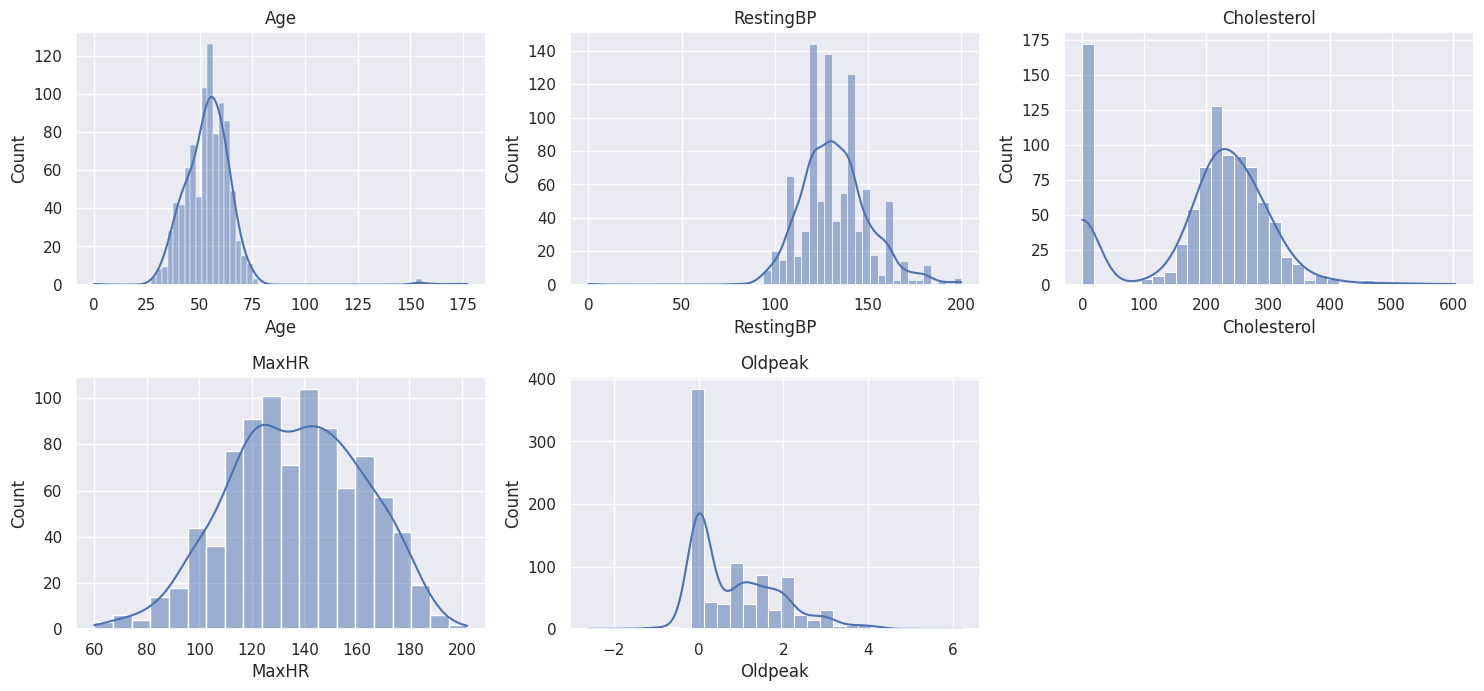

In [10]:
# memeriksa noise pada data variabel numerik menggunakan histogram
df_numerik = df.select_dtypes(include = ['float64', 'int64'])

plt.figure(figsize=(15, 10))

for col in df_numerik.columns:
  plt.subplot(3, 3, df_numerik.columns.get_loc(col) + 1)
  sns.histplot(data=df, x=col, kde=True)
  plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas ;

*   Pada variabel Age terdapat 0, kita asumsinya salah dalam menginputkan data sehingga kita jadikan nan dahulu dan umur yang diatas 150 kita asumsikan itu adalah noise yang harus dibersihkan
*   Pada variabel RestingBP terdapat 0 kita asumsinya salah dalam menginputkan data sehingga kita jadikan nan dahulu
*   Pada variabel Cholesterol terdapat 0 kita asumsinya salah dalam menginputkan data sehingga kita jadikan nan dahulu
*   Pada variabel oldpeak terdapat nilai yang negatif.





In [11]:
df.loc[(df.Age > 150) | (df.Age == 0.0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
74,155.0,M,ASY,140,268,0,Normal,128,Y,1.5,Flat,1
329,0.0,M,ASY,130,0,1,ST,130,Y,1.1,Down,1
389,161.0,M,ASY,160,0,1,ST,145,N,1.0,Flat,1
447,177.0,M,ASY,124,171,0,ST,110,Y,2.0,Up,1
626,153.0,M,ASY,142,226,0,LVH,111,Y,0.0,Up,0
687,170.0,M,ATA,156,245,0,LVH,143,N,0.0,Up,0
707,154.0,M,ASY,124,266,0,LVH,109,Y,2.2,Flat,1


Menampilkan semua data Age yang bernilai 0

In [12]:
df = df.drop(df[df.Age > 150].index)
df['Age'] = df['Age'].replace(to_replace=0.0, value=np.nan)

Menghapus semua data yang Agenya lebih dari 150 dan mengubah nilai 0 menjadi NaN

In [13]:
df.loc[(df.Cholesterol == 0.0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65.0,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32.0,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61.0,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50.0,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57.0,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43.0,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63.0,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48.0,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56.0,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


Menampilkan semua data cholesterol yang bernilai 0

In [14]:
df['Cholesterol'] = df['Cholesterol'].replace(to_replace=0.0, value=np.nan)

Mengubah pada data 'Cholesterol' yang nilainya 0 menjadi NaN

In [15]:
df.loc[(df.RestingBP == 0.0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55.0,M,NAP,0,NaN,0,Normal,155,N,1.5,Flat,1


Menampilkan data RestingBP yang memiliki nilai 0

In [16]:
df['RestingBP'] = df['RestingBP'].replace(to_replace=0.0, value=np.nan)

Mengubah pada data 'RestingBP' yang nilainya 0 menjadi NaN

In [17]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


In [18]:
#Pengecekan noise pada variabel kategori
catVar = df.select_dtypes(include = ['category'])

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sex :  {'M', nan, 'F'}
ChestPainType :  {'ASY', 'ATA', 'TA', 'NAP'}
FastingBS :  {0, 1}
RestingECG :  {'LVH', 'ST', 'Normal'}
ExerciseAngina :  {'Y', 'N'}
ST_Slope :  {'Down', 'Flat', 'Up'}
HeartDisease :  {0, 1}


Tidak terdapat ditemukan data yg tidak wajar/noise

# Cek Duplikasi

In [19]:
# mengecek apakah ada duplikat data sangatlah mudah menggunakan Pandas
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True]

(912, 12)
jumlah data yang duplikat 0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


Setelah dilakukan pengecekan duplikasi data, maka tidak ada data yang duplikat/sama sehingga tidak diperlukan penanganan


####**Melakukan penanganan pada duplikasi**



In [20]:
"""# menghapus entri yang memiliki data duplikat
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size"""

'# menghapus entri yang memiliki data duplikat\ndf.drop_duplicates(keep="first", inplace=True)\nprint(df.duplicated().sum()) # no more duplicates\nprint(df.shape) # re-check by printing data size'

# Cek Outlier

In [21]:
# Visual Python: Visualization > Seaborn
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'

    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'

        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center')
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

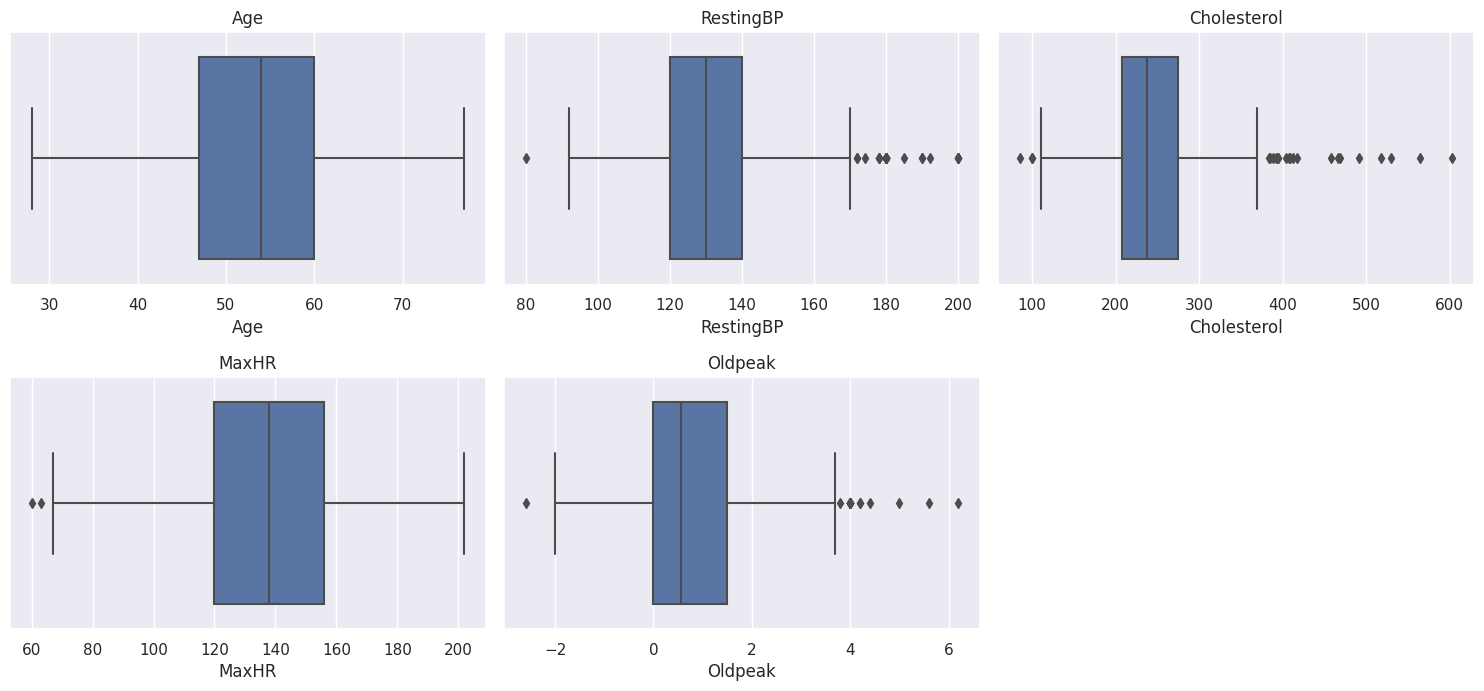

In [22]:
#membuat boxplot
plt.figure(figsize=(15, 10))

for col in df_numerik.columns:
  plt.subplot(3, 3, df_numerik.columns.get_loc(col) + 1)
  sns.boxplot(data=df, x=col)
  plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan hasil grafik diatas :
*   Variabel cholesterol banyak outliernya atau nilai extreme sehingga perlu dilakukan penanganan
*   Variabel RestingBP terdapat outlier sedikit sehingga diasumsikan tidak perlu dilakukan penanangan
*   Variabel Oldpeak sedikit outliernya sehingga diasumsikan selektif dalam penanangannya
*   Variabel MaxHR dada outlier tetapi tidak banyak sehingga diabaikan saja








In [23]:
# jika outlier difilter
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

df.loc[df[(df.Cholesterol < Q1-1.5*IQR) | (df.Cholesterol > Q3+1.5*IQR)].index].head()


Q1=207.0, Q3=275.0, IQR=68.0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53.0,F,ATA,113.0,468.0,0,Normal,127,N,0.0,Up,0
30,53.0,M,NAP,145.0,518.0,0,Normal,130,N,0.0,Flat,1
69,44.0,M,ASY,150.0,412.0,0,Normal,170,N,0.0,Up,0
76,32.0,M,ASY,118.0,529.0,0,Normal,130,N,0.0,Flat,1
78,52.0,M,ATA,140.0,100.0,0,Normal,138,Y,0.0,Up,0


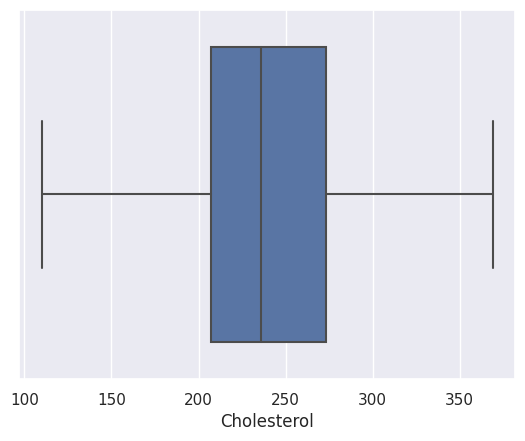

(889, 12)

In [24]:
df = df.drop(df[(df.Cholesterol < Q1-1.5*IQR) | (df.Cholesterol > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Cholesterol", data=df)
plt.show()
df.shape

In [25]:
# jika outlier difilter
# jika outlier difilter
Q1 = df['Oldpeak'].quantile(0.25)
Q3 = df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

df.loc[df[(df.Oldpeak < Q1-1.5*IQR)].index]

Q1=0.0, Q3=1.5, IQR=1.5


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
324,46.0,M,ASY,100.0,NaN,1,ST,133,N,-2.6,Flat,1


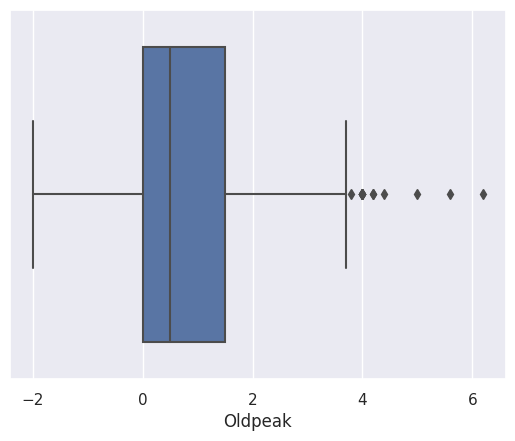

(888, 12)

In [26]:
df = df.drop(df[(df.Oldpeak < Q1-1.5*IQR)].index)
p = sns.boxplot(x="Oldpeak", data=df)
plt.show()
df.shape

# Cek missing value

In [27]:
# General Look at the Missing Values
print(df.isnull().sum())

Age                 7
Sex                10
ChestPainType       0
RestingBP           1
Cholesterol       170
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64


In [28]:
# cek persentase missing tiap variabel
(df.isnull().sum()/len(df)*100).to_frame('persentase missing')

,persentase missing
Age,0.788288
Sex,1.126126
ChestPainType,0.000000
RestingBP,0.112613
Cholesterol,19.144144
FastingBS,0.000000
RestingECG,0.000000
MaxHR,0.000000
ExerciseAngina,0.000000
Oldpeak,0.000000


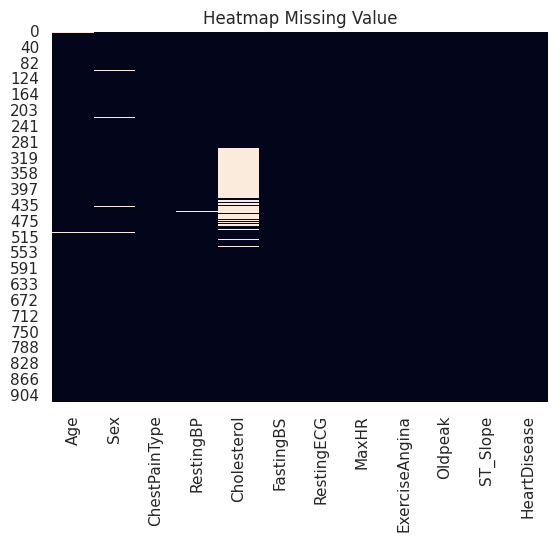

In [29]:
# visualisasi missing value
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

Untuk penanganan missing value kita menggunakan penanangan untuk dihapuskan

In [30]:
df["Cholesterol"].fillna(df["Cholesterol"].mean(), inplace = True)

Kita lakukan imputasi yaitu dengan menginputkan nilai NaN pada variabel Cholesterol dengan rata rata

In [31]:
X = df.dropna()
print(df.shape, X.shape)
X.head()

(888, 12) (871, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120.0,339.0,0,Normal,170,N,0.0,Up,0


Menghapus data yang mengandung nilai NaN

In [32]:
print(X.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Hasilnya sudah bersih, tidak ada missing value.

                                             |          | [  0%]   00:00 -> (? left)


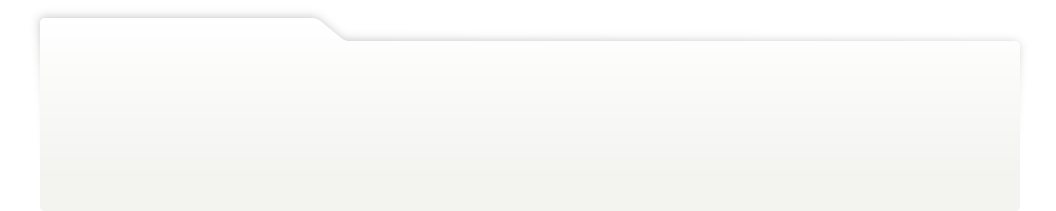
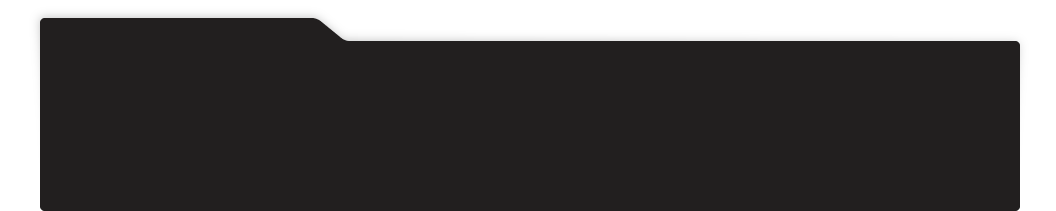
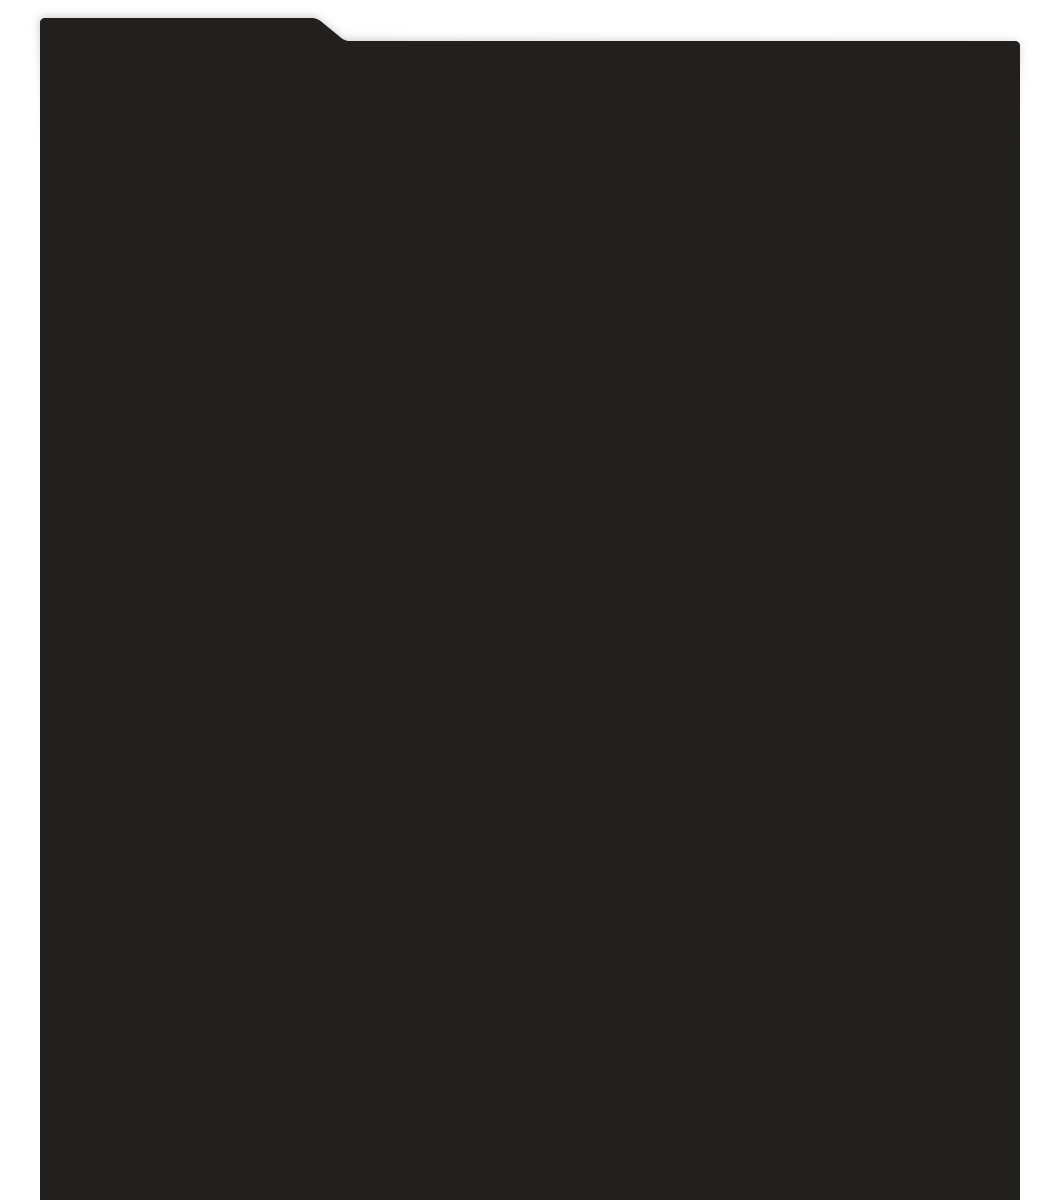
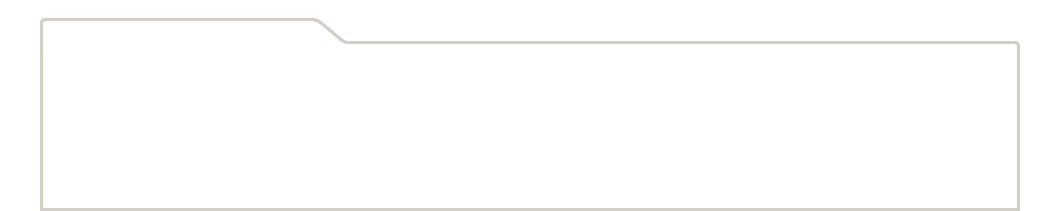
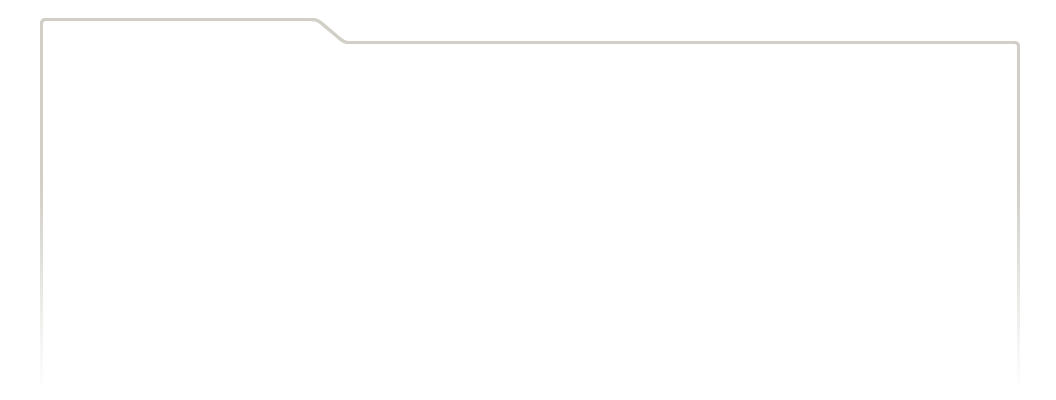
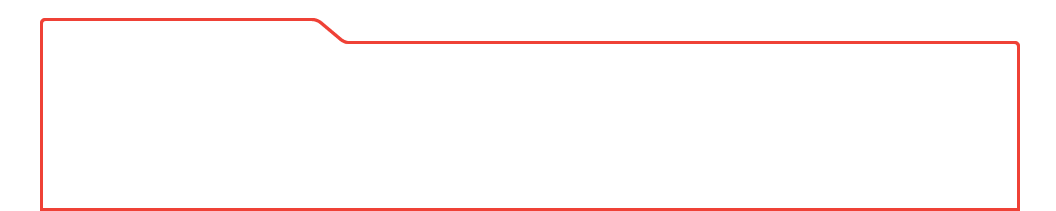
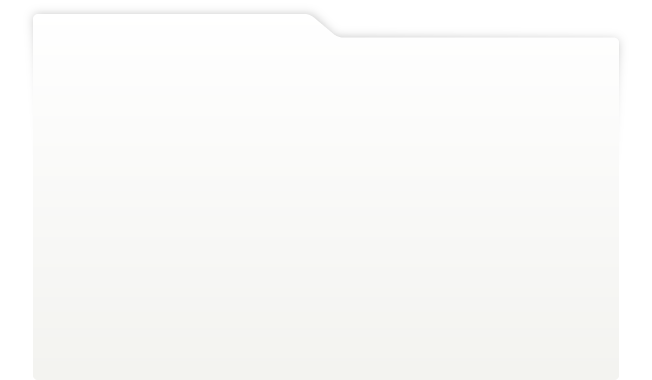
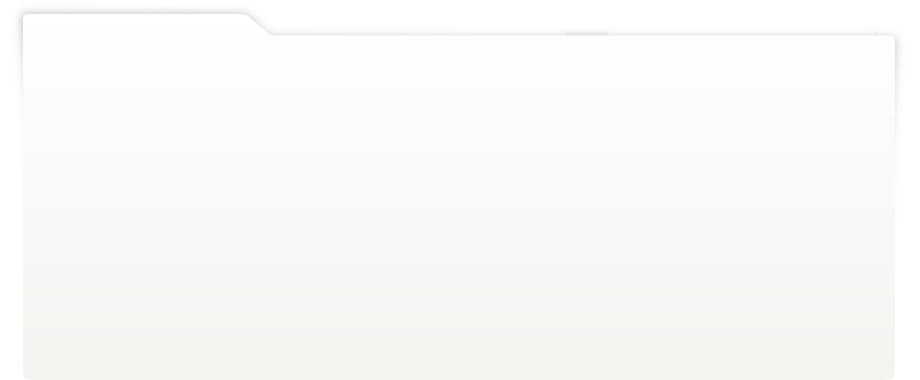
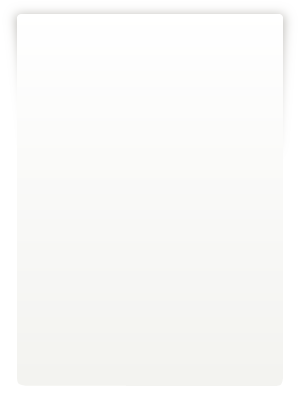
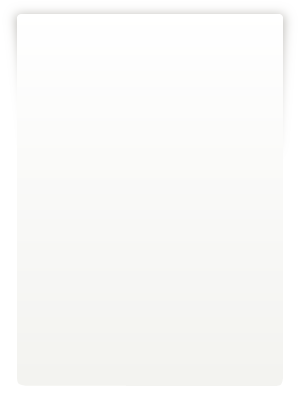
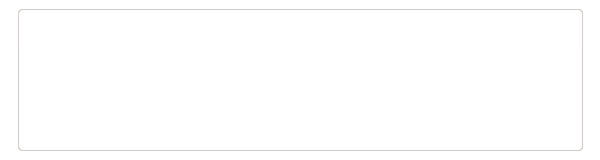
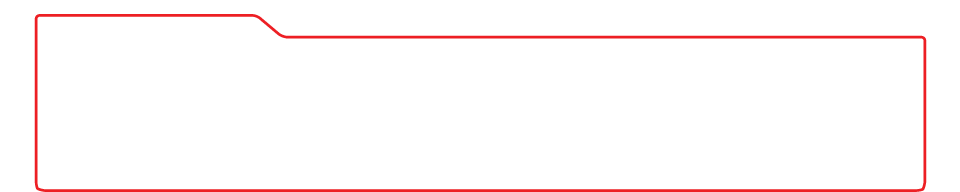
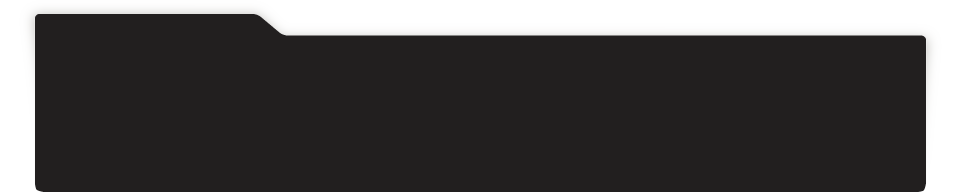
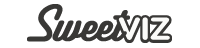
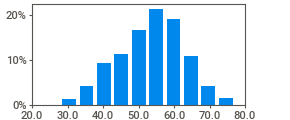
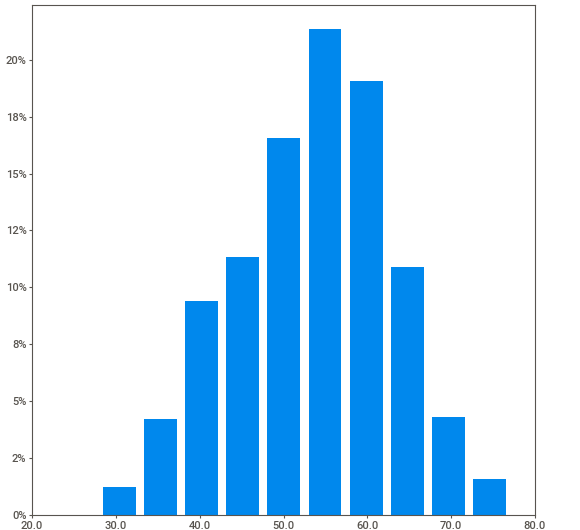
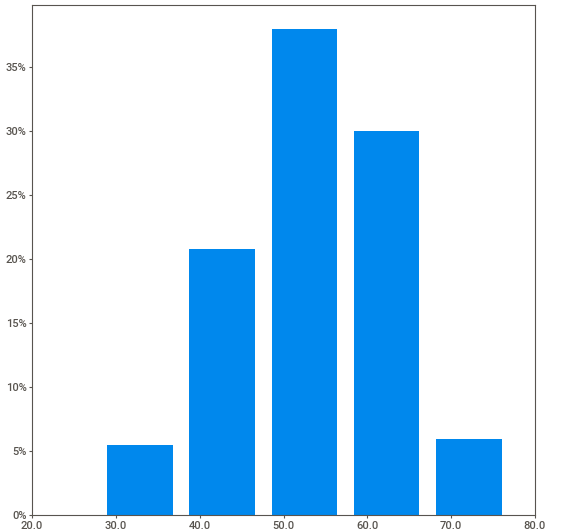
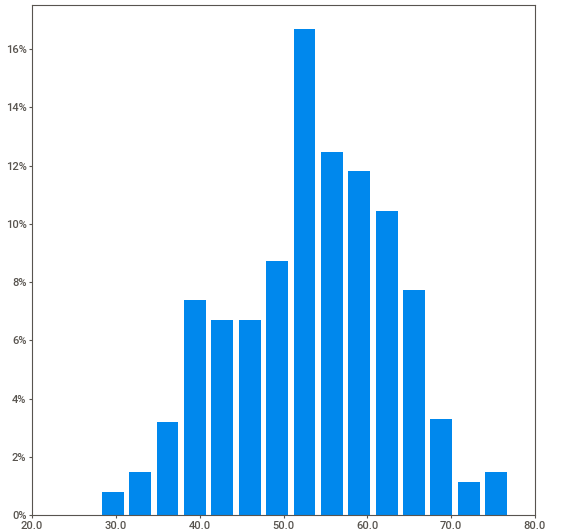
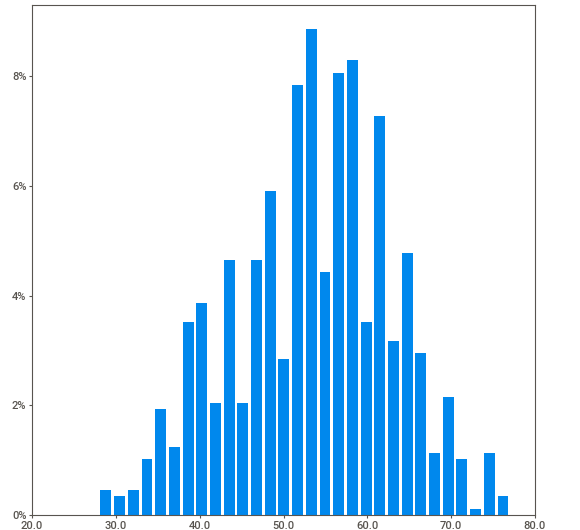
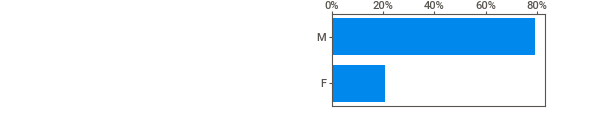
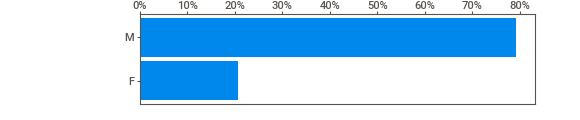
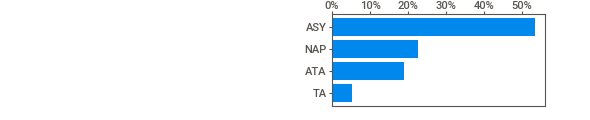
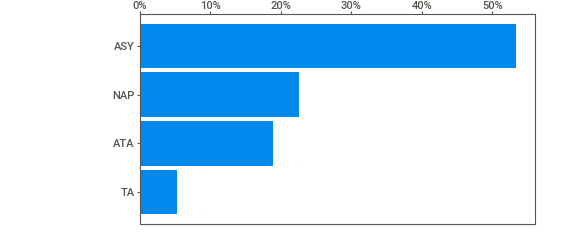
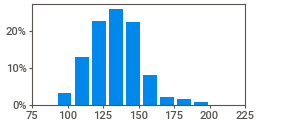
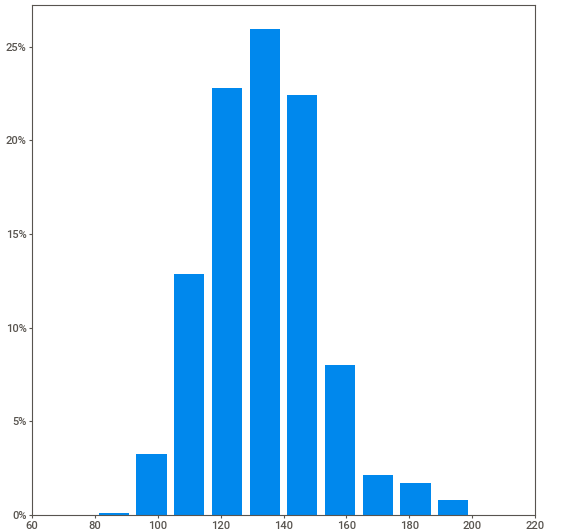
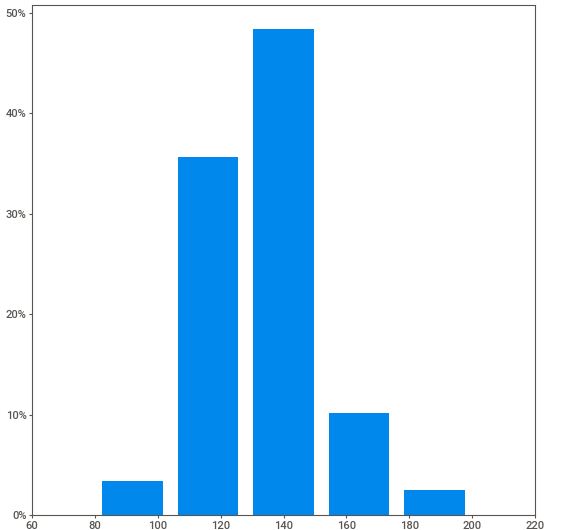
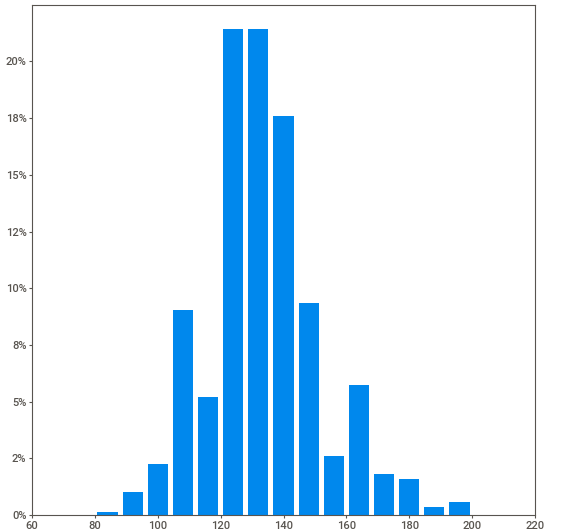
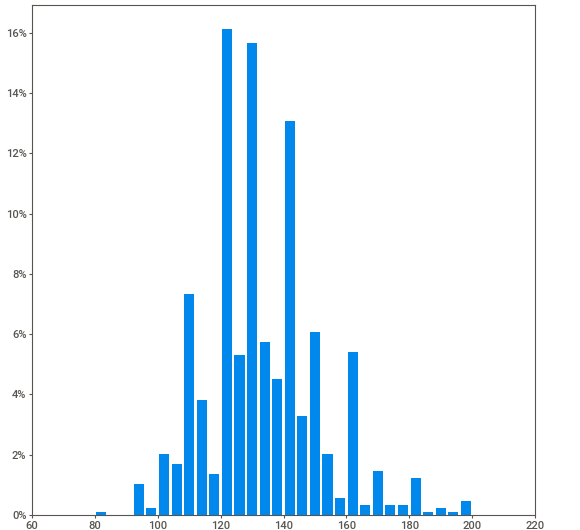
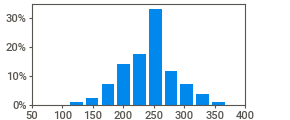
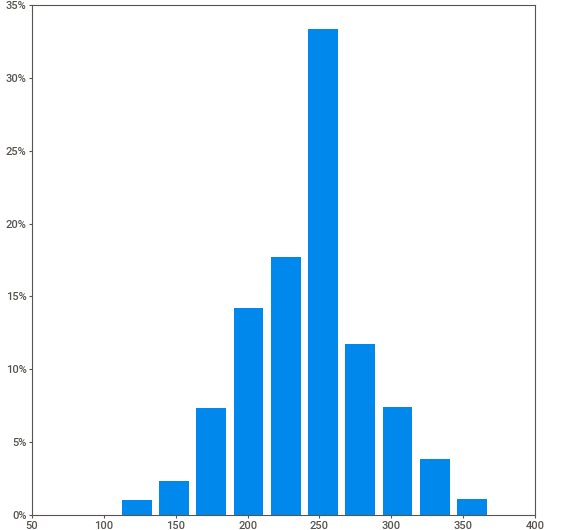
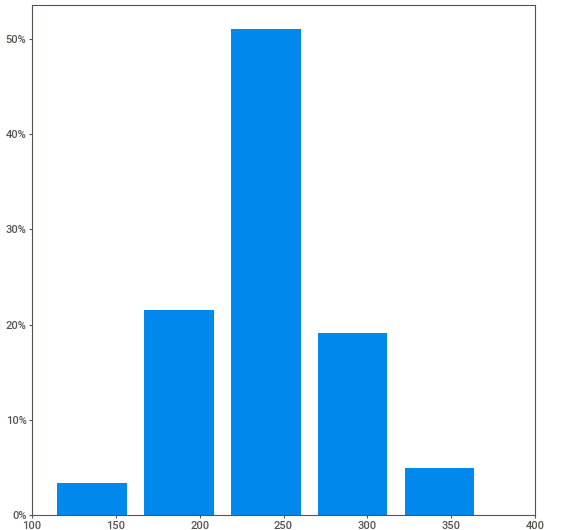
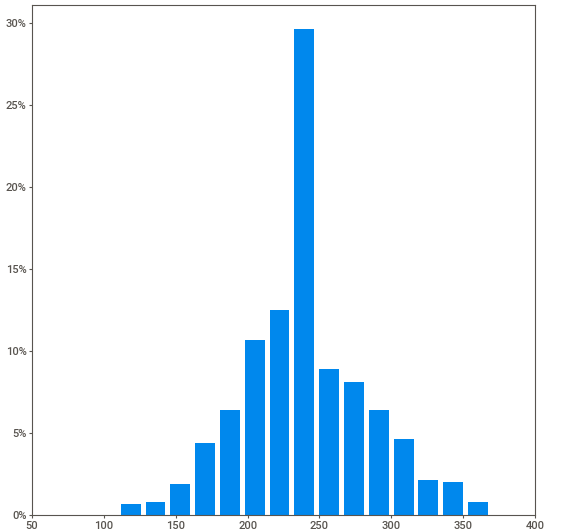
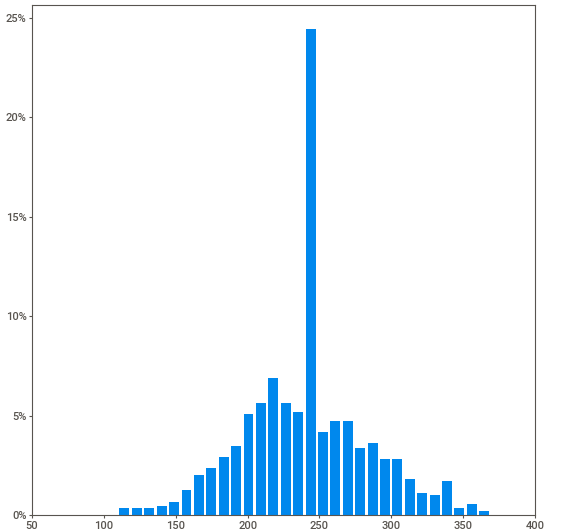
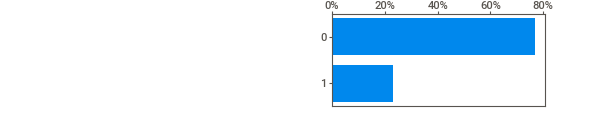
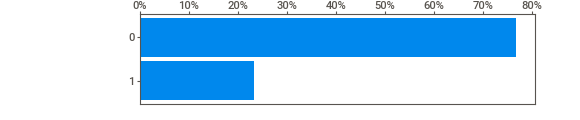
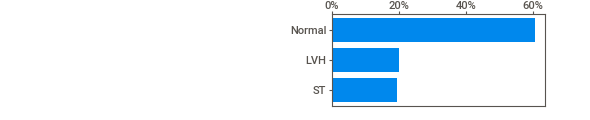
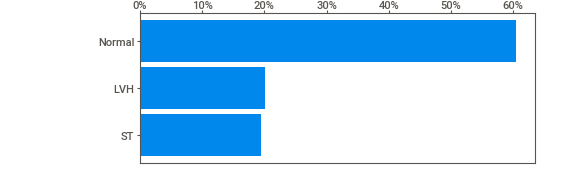
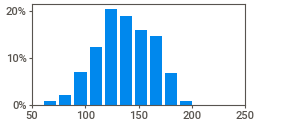
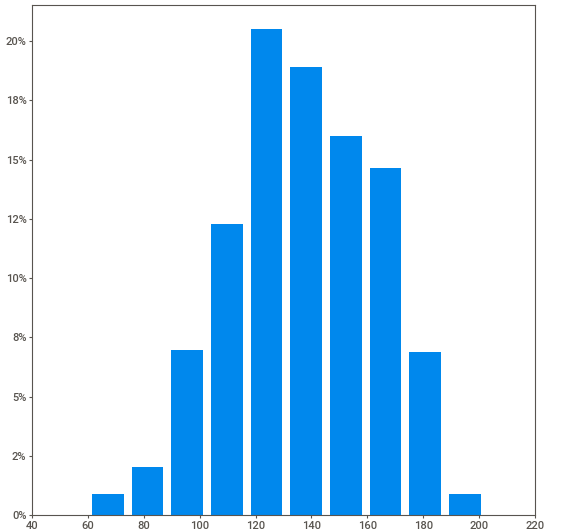
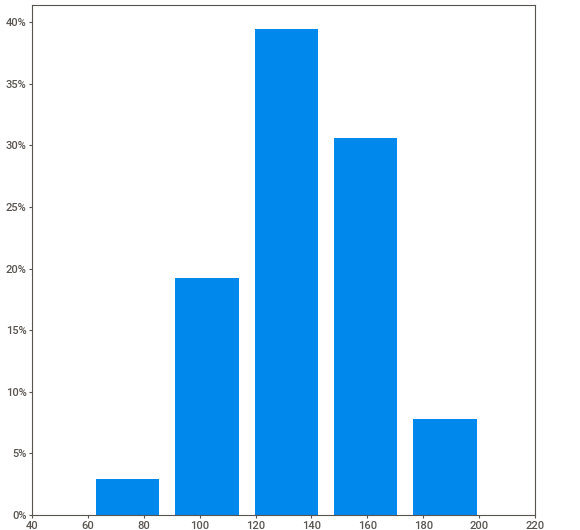
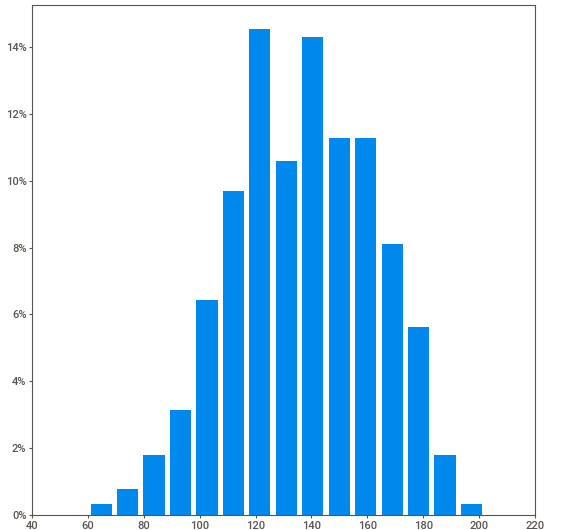
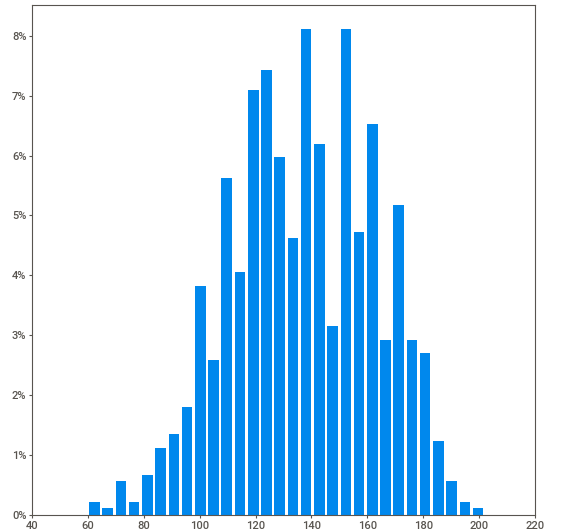
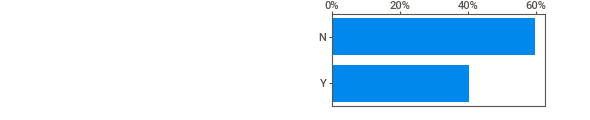
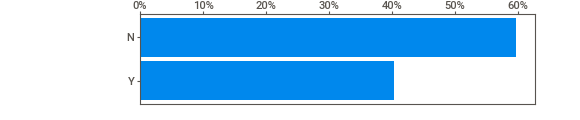
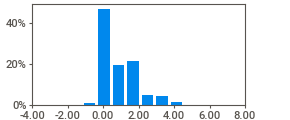
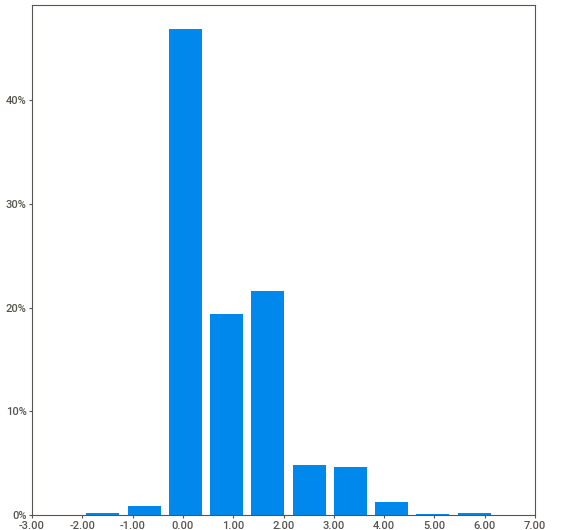
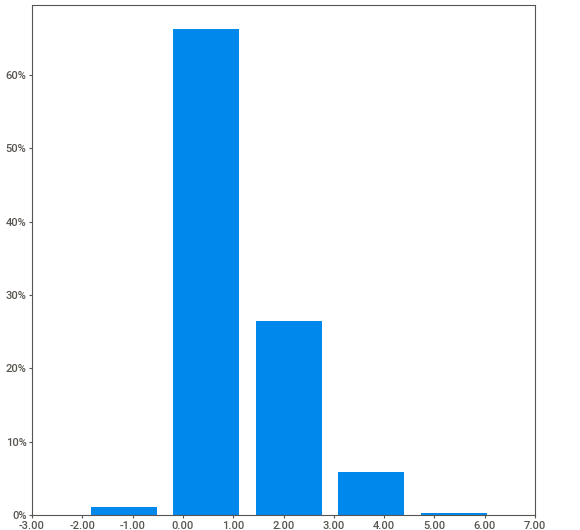
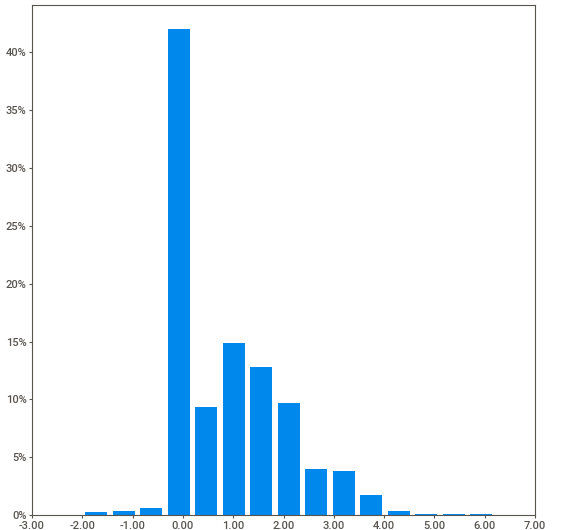
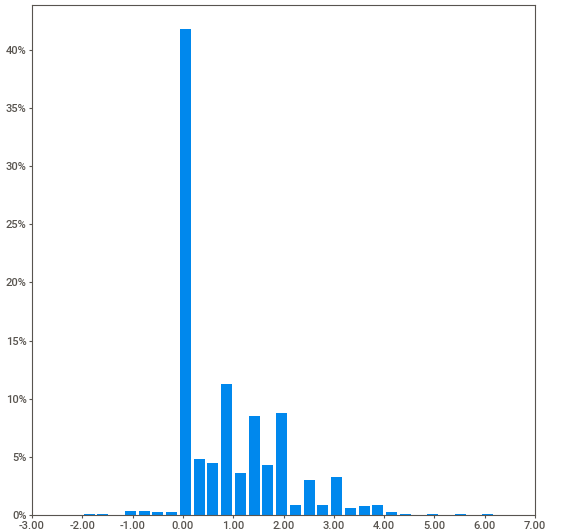
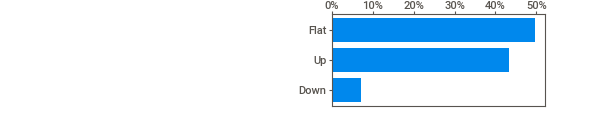
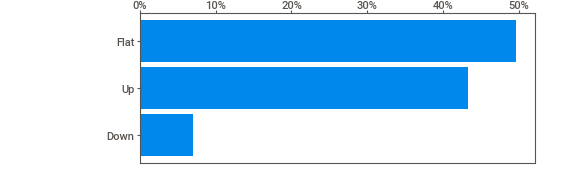
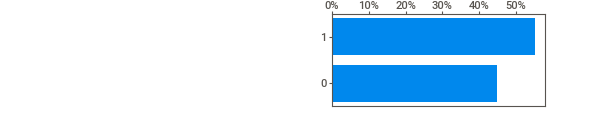
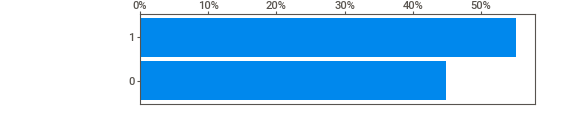
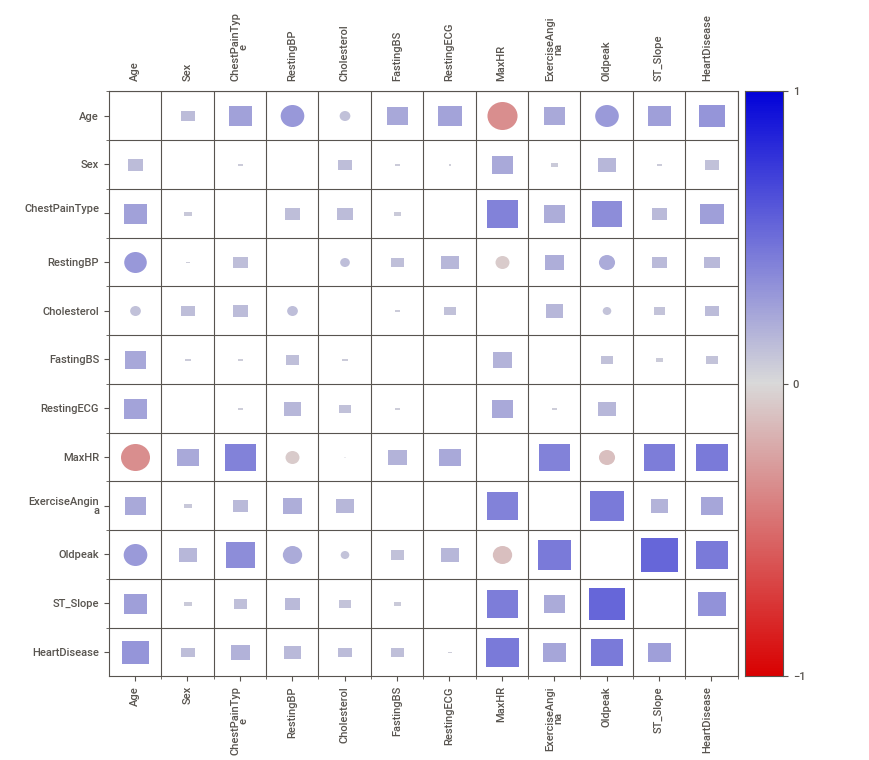
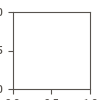

In [33]:
# Report setelah data dibersihkan
report = sweetviz.analyze([df, 'clean_data'])
report.show_notebook()
report

#Tranformasi

####One-Hot-Encoding

In [34]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120.0,339.0,0,Normal,170,N,0.0,Up,0


In [35]:
# transformasi seluruh variabel kategorik
print(X.shape)
for col in X.select_dtypes('category').columns:
  if col != 'HeartDisease':
    transformasi = pd.get_dummies(X[col], prefix='')
    X = pd.concat([X, transformasi], axis = 1)
    # hapus variabel kategorik awal, sudah tidak diperlukan
    try:
      X.drop([col], axis=1, inplace=True)
    except Exception as err_:
      print(err_)

print(X.shape)
X.head()

(871, 12)
(871, 22)


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49.0,160.0,180.0,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130.0,283.0,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48.0,138.0,214.0,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54.0,150.0,195.0,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
5,39.0,120.0,339.0,170,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [36]:
X.to_csv("data/HeartDieses_PreProcessed.csv", encoding='utf8', index=False)

#Klasifikasi Model

In [37]:
# Loading Data Preprocessed
file_ = 'data/HeartDieses_PreProcessed.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df_pre = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/ilman79/PelatihanBNSP/main/HeartDieses_PreProcessed.csv
    df_pre = pd.read_csv(file_)

N, P = df_pre.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df_pre.head()

baris =  871 , Kolom (jumlah variabel) =  22


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,...,_0,_1,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
0,49.0,160.0,180.0,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1,37.0,130.0,283.0,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
2,48.0,138.0,214.0,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,54.0,150.0,195.0,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
4,39.0,120.0,339.0,170,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


#Train dan Test Data

In [38]:
predictor = df_pre.loc[:, ~df_pre.columns.isin(['HeartDisease'])]
target = df_pre['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=33) #fungsi rekursif; proses probabilistik untuk hasilnya bisa divalidasi
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(609, 21) (609,)
(262, 21) (262,)


Membagi/split data dengan persentase data test 0.3 dan data trainnya adalah 0.7 dengan sheet/random statenya 33

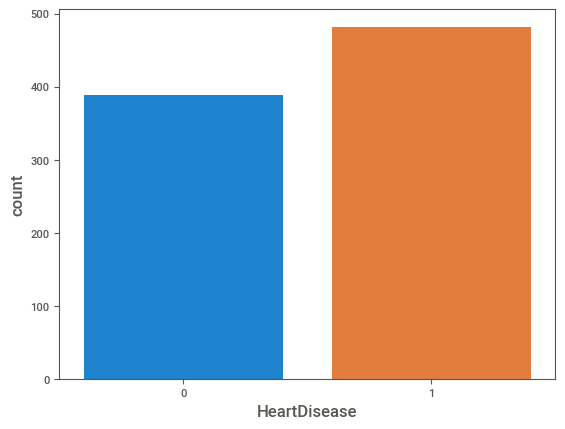

Counter({1: 482, 0: 389})
0 44.66130884041332 1 55.33869115958668 %


In [39]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=df_pre, x='HeartDisease')
plt.show()

D = Counter(df_pre['HeartDisease'])
print(D)
print("0", D[0]*100/(len(df_pre['HeartDisease'])), '1',D[1]*100/(len(df_pre['HeartDisease'])) ,'%')

Persentase dari hasil prediksi/target yang sudah dilabelkan sebelumnya

#Model Regresi Logistik

In [40]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[ 95  16]
 [ 23 128]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       111
           1       0.89      0.85      0.87       151

    accuracy                           0.85       262
   macro avg       0.85      0.85      0.85       262
weighted avg       0.85      0.85      0.85       262



Hasilnya dari model regresi logistik yang menghasilkan akurasi sebesar

In [53]:
# Menampilkan koefisien
coefficients = reglog.coef_[0]
intercept = reglog.intercept_[0]

# Menampilkan persamaan regresi logistik
equation_terms = [f"{coeff:.4f} * X{i}" for i, coeff in enumerate(coefficients, start=1)]
equation = f"Logit(P(Y=1)) = {intercept:.4f} + {' + '.join(equation_terms)}"

print("Persamaan Regresi Logistik:")
print(equation)


Persamaan Regresi Logistik:
Logit(P(Y=1)) = -0.0889 + 0.0202 * X1 + -0.0085 * X2 + 0.0062 * X3 + -0.0109 * X4 + 0.3141 * X5 + -0.7300 * X6 + 0.6425 * X7 + 1.2692 * X8 + -0.5103 * X9 + -0.7071 * X10 + -0.1394 * X11 + -0.7900 * X12 + 0.7025 * X13 + 0.1444 * X14 + -0.0028 * X15 + -0.2291 * X16 + -0.4317 * X17 + 0.3441 * X18 + 0.1820 * X19 + 1.0184 * X20 + -1.2879 * X21


**Interpretasi:**
1. **Intercept (Konstanta):**
   - Intercept (\(-0.0889\)) adalah nilai log-odds ketika semua fitur (\(X1\) hingga \(X21\)) memiliki nilai 0.
   - Nilai intercept mewakili baseline log-odds untuk kategori target (\(Y=1\)).

2. **Koefisien untuk Fitur-Fitur (X1 hingga X21):**
   - Setiap koefisien (\(0.0202\), \(-0.0085\), ..., \(-1.2879\)) mengukur perubahan relatif dalam log-odds untuk setiap satu unit perubahan dalam nilai fitur yang bersangkutan.
   - Contohnya, jika \(X1\) bertambah satu unit, log-odds dari \(Y=1\) diharapkan meningkat sebesar \(0.0202\).

3. **Pola Hubungan:**
   - Jika koefisien positif, peningkatan nilai fitur tersebut dikaitkan dengan peningkatan kemungkinan (\(P(Y=1)\)).
   - Jika koefisien negatif, peningkatan nilai fitur tersebut dikaitkan dengan penurunan kemungkinan (\(P(Y=1)\)).
   - Penting untuk memperhatikan tanda koefisien untuk mengetahui arah dan tingkat hubungan.

4. **Contoh Interpretasi:**
   - Sebagai contoh, koefisien positif untuk \(X5\) (\(0.3141\)) menunjukkan bahwa peningkatan nilai \(X5\) dikaitkan dengan peningkatan kemungkinan (\(P(Y=1)\)).
   - Sebaliknya, koefisien negatif untuk \(X6\) (\(-0.7300\)) menunjukkan bahwa peningkatan nilai \(X6\) dikaitkan dengan penurunan kemungkinan (\(P(Y=1)\)).


#Cross Validasi

In [42]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=15) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.86 (+/- 0.11), Waktu = 2.007 detik


Melakukan cross validasi pada model regresi logistik secara berulang sebanyak 15 kali perulangan dengan variabel yang berbeda agar lebih menyakinkan lagi model tersebut

RegLog    0.741379
dtype: float64

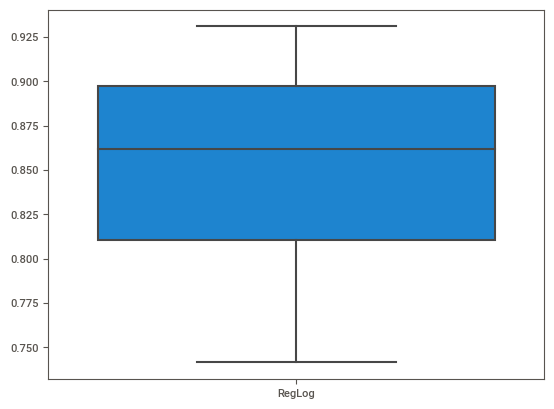

In [43]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

Hasil dari cross validasi, nilai minimum yang didapat pada range 0.74 sampai dengan 0.93

#Model Decision Tree

In [44]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[ 84  27]
 [ 23 128]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       111
           1       0.83      0.85      0.84       151

    accuracy                           0.81       262
   macro avg       0.81      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262





- **True Positive (TP):** 128
- **True Negative (TN):** 84
- **False Positive (FP):** 27
- **False Negative (FN):** 23

Interpretasi:

1. **Matriks Konfusi:**
   - **True Positive (TP):** 128; jumlah observasi positif yang diprediksi dengan benar.
   - **True Negative (TN):** 84; jumlah observasi negatif yang diprediksi dengan benar.
   - **False Positive (FP):** 27; jumlah observasi negatif yang salah diprediksi sebagai positif (kesalahan Type I).
   - **False Negative (FN):** 23; jumlah observasi positif yang salah diprediksi sebagai negatif (kesalahan Type II).

2. **Laporan Klasifikasi:**
   - **Precision:** Kemampuan model untuk tidak memberikan prediksi positif yang salah. Precision untuk kelas 0: 0.79, untuk kelas 1: 0.83.
   - **Recall (Sensitivitas):** Kemampuan model untuk menemukan semua instance positif yang sebenarnya. Recall untuk kelas 0: 0.76, untuk kelas 1: 0.85.
   - **F1-Score:** Penggabungan antara precision dan recall. F1-Score untuk kelas 0: 0.77, untuk kelas 1: 0.84.
   - **Accuracy:** Akurasi keseluruhan model: 0.81.
   - **Macro Avg dan Weighted Avg:** Nilai rata-rata dari precision, recall, dan f1-score, dengan bobot yang sama atau berdasarkan distribusi kelas.

Kesimpulan:
- Model memiliki akurasi sekitar 0.81, yang berarti sekitar 81% dari prediksi model adalah benar.
- Model cenderung lebih baik dalam mengidentifikasi kelas 1 (recall 0.85) dibandingkan dengan kelas 0 (recall 0.76).
- Precision untuk kedua kelas relatif tinggi, menunjukkan bahwa ketika model membuat prediksi positif, prediksinya cenderung akurat.

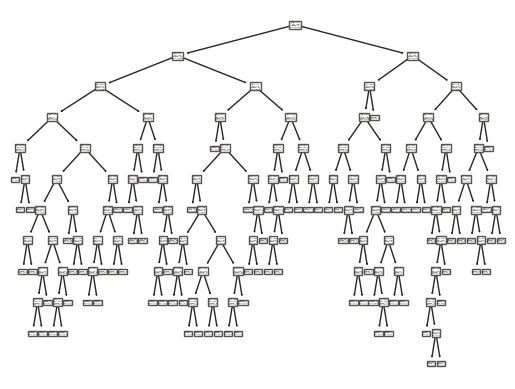

In [45]:
# Warning cell ini butuh waktu Lama untuk selesai!...

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(xTrain, yTrain)
p = tree.plot_tree(clf)

In [46]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=15) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.79 (+/- 0.11), Waktu = 0.110 detik


Dilakukan cros validasi sebanyak 15 kali perulangan yang menghasilkan akurasinya 0.79

RegLog     0.741379
DecTree    0.655172
dtype: float64

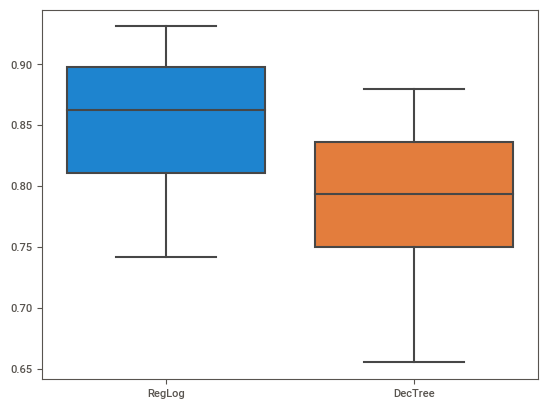

In [47]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

Membandingkan kedua model dari hasil acurracy modelnya yaitu,
- Model Regresi Logistik memiliki nilai akurasi terendah (minimum) sekitar 0.7414.
- Model Pohon Keputusan memiliki nilai akurasi terendah (minimum) sekitar 0.6552.



In [48]:
# Atau secara programmatic
from sklearn.pipeline import make_pipeline
from sklearn import linear_model #import LogisticRegression

pipeSVM = make_pipeline(linear_model.LogisticRegression())
print(sorted(pipeSVM.get_params().keys()))

['logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start', 'memory', 'steps', 'verbose']


In [49]:
# Hyperparameter optimization pada model Regresi Logistik menggunakan gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8719143747459693
{'penalty': 'none'}


Tujuan dari optimasi hyperparameter pada model Regresi Logistik menggunakan GridSearchCV (Grid Cross-Validation) adalah untuk menemukan kombinasi hyperparameter yang memberikan kinerja model terbaik. Dan hyperparameter yang yang memberikan skor terbaik adalah {'penalty': 'none'} dengan skor 0.8719143747459693

In [50]:
pipeDT = make_pipeline(tree.DecisionTreeClassifier())
print(sorted(pipeDT.get_params().keys()))

['decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter', 'memory', 'steps', 'verbose']


In [51]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8339071038251367
{'max_depth': 3, 'criterion': 'entropy'}


- Model Pohon Keputusan dengan kombinasi hyperparameter max_depth setara dengan 3 dan criterion setara dengan 'gini' memberikan akurasi sekitar 0.8405 pada data evaluasi atau melalui validasi tertentu.
- Kedalaman pohon yang relatif rendah (3) menunjukkan bahwa model cenderung tidak terlalu kompleks, yang dapat membantu mencegah overfitting pada data pelatihan.
- Penggunaan kriteria 'gini' mengindikasikan bahwa pohon keputusan menggunakan indeks Gini untuk mengukur kualitas split saat membangun pohon.

#Model Selection

Accuracy RL: 0.85 (+/- 0.11)
Accuracy DT: 0.81 (+/- 0.12)


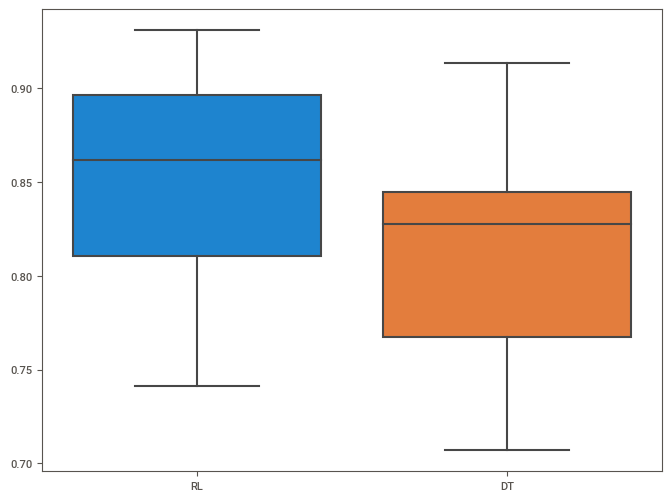

In [52]:
kCV = 15 # Aslinya usahakan 10, idealnya 30 ... mengapa?
# Menggunakan parameter optimal
RL_opt = LogisticRegression(solver= 'newton-cg')
DT_opt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

# Melakukan Cross Validasi
models = ['RL', 'DT']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)



*   Model Regresi Logistik memiliki akurasi rata-rata yang sedikit lebih tinggi (0.85) dibandingkan dengan model Pohon Keputusan (0.81) selama proses validasi silang.
*   Interval kepercayaan yang lebih kecil menunjukkan bahwa akurasi model Regresi Logistik memiliki variasi yang lebih rendah dibandingkan dengan model Pohon Keputusan.



